In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import time

# Q1.) Classification Algorithms.

In [2]:
## Perceptron Algorithm
from sklearn.linear_model import Perceptron
begin_time = time.time()
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)

In [3]:
## Support Vector Machine 
from sklearn.svm import SVC
begin_time = time.time()
svm_rbf = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm_lin = SVC(kernel='linear', random_state=1, C=1.0)

In [4]:
## Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
begin_time = time.time()
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

# Q2.) Testing the Algorithms.

## Digits Dataset

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
digits = datasets.load_digits()

In [6]:
print('digits keys:', list(digits.keys()))
print('digits target_names:', digits.target_names)

digits keys: ['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']
digits target_names: [0 1 2 3 4 5 6 7 8 9]


In [7]:
digits.data.shape

(1797, 64)

In [8]:
X, y = datasets.load_digits(return_X_y=True)
print(np.unique(y))

[0 1 2 3 4 5 6 7 8 9]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [10]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [178 182 177 183 181 182 181 179 174 180]
Labels counts in y_train: [124 127 124 128 127 127 127 125 122 126]
Labels counts in y_test: [54 55 53 55 54 55 54 54 52 54]


In [11]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [12]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [13]:
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [14]:
svm_rbf.fit(X_train_std, y_train)

SVC(C=10.0, gamma=0.1, random_state=1)

In [15]:
svm_lin.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [16]:
tree_model.fit(X_train_std, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

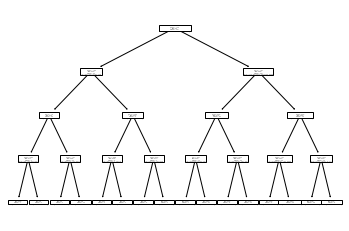

In [17]:
tree.plot_tree(tree_model)
plt.show()

## Iris Dataset

In [18]:
iris = datasets.load_iris()

In [19]:
print('Iris keys:', list(iris.keys()))
print('Iris features:', iris.feature_names)

Iris keys: ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
Iris features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [20]:
iris.data.shape

(150, 4)

In [21]:
X = iris.data[:,[2,3]]
y = iris.target

In [22]:
print(np.unique(y))

[0 1 2]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [24]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [25]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [26]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [27]:
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [28]:
svm_rbf.fit(X_train_std, y_train)

SVC(C=10.0, gamma=0.1, random_state=1)

In [29]:
svm_lin.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [30]:
tree_model.fit(X_train_std, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

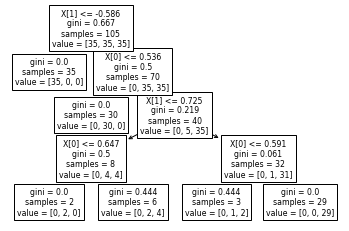

In [31]:
tree.plot_tree(tree_model)
plt.show()

# Q3.) Analyzing the Algorithms behavior using Accuracy and Running Time.

In [32]:
print('Accuracy for Perceptron: %.2f' % ppn.score(X_test_std, y_test))
end_time = time.time()
time_taken = end_time - begin_time
print("Time Taken for the Perceptron:",time_taken)

Accuracy for Perceptron: 0.98
Time Taken for the Perceptron: 4.21696925163269


In [33]:
print('Accuracy for Linear kernel SVM: ' , svm_lin.score(X_test_std, y_test))
end_time = time.time()
time_taken = end_time - begin_time
print("Time Taken for the Linear kernel SVM:",time_taken)

Accuracy for Linear kernel SVM:  0.9777777777777777
Time Taken for the Linear kernel SVM: 4.276249408721924


In [34]:
print('Accuracy for RBF kernel SVM: %.2f' % svm_rbf.score(X_test_std, y_test))
end_time = time.time()
time_taken = end_time - begin_time
print("Time Taken for the RBF kernel SVM:",time_taken)

Accuracy for RBF kernel SVM: 0.98
Time Taken for the RBF kernel SVM: 4.364197492599487


In [35]:
print('Accuracy for Decision Tree: %.4f' % tree_model.score(X_test_std, y_test))
end_time = time.time()
time_taken = end_time - begin_time
print("Time Taken for the Decision Tree:",time_taken)

Accuracy for Decision Tree: 0.9778
Time Taken for the Decision Tree: 4.4434897899627686


### From the above analysis we can say that the Perceptron Algorithm has a better accuracy with less running time compared to SVM and Decision Tree.

### And the SVM algorithm using the RBF kernel has a slightly better accuracy than that of the Linear kernel but the running time of the Linear kernel is better than that of the running time of RBF kernel.